In [8]:
import numpy as np
from matplotlib import pyplot as plt

### Equations:

\begin{equation} \tag{1}
m_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} m_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} m_{i-1}^{(t-1)} - a_i^{(t)}
\end{equation}

\begin{equation*} \tag{2}
n_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} n_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} n_{i-1}^{(t-1)} - b_i^{(t)}
\end{equation*}

\begin{equation*} \tag{3}
(a_i^{(t)} + b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*} \tag{4}
(a_i^{(t)} + b_i^{(t)})^2 = a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

### Solving:

Strategy: at each time $t$, suppose we have $m_{i+1}^{(t-1)}$, $m_{i-1}^{(t-1)}$ and $n_{i+1}^{(t-1)}$, $n_{i-1}^{(t-1)}$. <br>
Then, first solve for $a_i^{(t)}$ and $b_i^{(t)}$ using eq (3) and eq (4). <br>
Plug into to eq (1) and eq (2) to solve for $m_{i}^{(t)}$ and $n_{i}^{(t)}$.

Equating (3) and (4):

\begin{equation*}
a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)}) = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{(m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})}{(n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})} b_i^{(t)}
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} b_i^{(t)}
\end{equation*}

where $\Delta m$ and $\Delta n$ are calculable constants obtained from previous timestep: 

\begin{equation*}
\Delta m = (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta n = (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

Expanding (3):

\begin{equation*}
(a_i^{(t)})^2 + 2 a_i^{(t)} b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

Substituting expression for $a_i^{(t)}$ in terms of $b_i^{(t)}$:

\begin{equation*}
(\frac{\Delta m}{\Delta n} b_i^{(t)})^2 + 2 (\frac{\Delta m}{\Delta n} b_i^{(t)}) b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} \Delta m
\end{equation*}

\begin{equation*}
(b_i^{(t)})^2 \left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right) = b_i^{(t)} \Delta m
\end{equation*}

if $b_i^{(t)} \neq 0$:

\begin{equation*}
b_i^{(t)} = \frac{\Delta m}{\left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right)}
\end{equation*}

\begin{equation*}
= \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

which means:

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

Finally, we can plugin values of $a_i^{(t)}$ and $b_i^{(t)}$ into eq (1) and eq (2) to obtain $m_i^{(t)}$ and $n_i^{(t)}$.

### Initialization:

#### Contants:
Left end = $-k$ <br>
Right end = $l$ <br>
Payoff factor = $\lambda$ <br>

#### Positional Boundary Values:
$n_{-k}^{(t)} = 1$ -------- $n_{l}^{(t)} = 0$ <br>
$m_{-k}^{(t)} = 0$ -------- $m_{l}^{(t)} = \lambda$ <br>
for all time step $t$ <br>

#### Time Boundary Values:
$m_i^{(0)} = \frac{\lambda}{k+l}(i+k)$ <br>
$n_i^{(0)} = \frac{l-i}{k+l}$ <br>
for all positions $-k \leq i \leq l$ <br>

In [9]:
def initializeLine(right = 6, left = 6, time = 100, maxi_reward = 100000, mina_reward = 99994):
    k = right     # left endpoint: -k
    l = left      # right endpoint: l
    L = k+l+1    # total length: k+l
    T = time   # Time steps

    # Note: position index i will be shifted
    # before: left end = -k, middle = 0, right end = l
    # now: left end = 0, middle = k, right end = k + l (= L)

    m_lambda = maxi_reward
    n_lambda = mina_reward


    # initialize the m,n values are time t=0, 
    # then iterate starting from t=1, use m(t-1), n(t-1) to compute a(t) and b(t) 
    # then use a(t) and b(t) to compute m(t) and n(t)

    # Each matrix: vertical axis (rows): time step, horizontal axis (colunmns): position
    # Therefore, m[t][i] access m value at time t, position index i
    a = np.zeros(T*L).reshape((T, L))
    b = np.zeros(T*L).reshape((T, L))
    m = np.zeros(T*L).reshape((T, L))
    n = np.zeros(T*L).reshape((T, L))

    # Initialize positional boundary values
    for t in range(a.shape[0]):
        n[t][0] = n_lambda
        m[t][0] = 0
        n[t][L-1] = 0
        m[t][L-1] = m_lambda
        
    # Initialize time boundary values
    for i in range(L):
        t = i / (L - 1)
        
        if i == 0:
            m[0][i] = 0
            n[0][i] = n_lambda
        elif i == L - 1:
            m[0][i] = m_lambda
            n[0][i] = 0
        else:

            m[0][i] = m_lambda * (np.arctan(10 * t - 5) / np.pi + 0.5)
            n[0][i] = n_lambda * (np.arctan(5-(10 * t)) / np.pi + 0.5)
    return a,b,m,n
a,b,m,n = initializeLine()

In [47]:
print(m[1])

[     0.           2319.47864357   8651.26495719  11258.65904768
  16055.60569786  25402.05721253  38943.56037486  58199.97025027
  76057.91770115  84779.21417764  89041.74119766  93042.1207358
 100000.        ]


In [29]:
# Recursive solving algorithm
def iterateAMBN(a, b, m, n, t, DEBUG = True):
    L = a.shape[1]
    if DEBUG:
        print(f"-------------- step {t} --------------")
    for i in range(1, L-1):
        delta_m = m[t-1][i+1] - m[t-1][i-1]
        delta_n = n[t-1][i-1] - n[t-1][i+1]
        # Compute a,b using previous m,n
        b[t][i] = delta_m / (((delta_m / delta_n) + 1))
        b[t][i] /= ((delta_m / delta_n) + 1)
        a[t][i] = (delta_m/delta_n) * b[t][i]
        # Compute current m,n using current a,b
        m[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*m[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*m[t-1][i-1] - a[t][i]
        n[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*n[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*n[t-1][i-1] - b[t][i]
    
        if DEBUG:
            print("Previous m, n:")
            print(m[t-1][i+1], m[t-1][i-1], n[t-1][i+1], n[t-1][i-1])
            print("Delta m, Delta n:")
            print(delta_m, delta_n)
            print("Current a, b:")
            print(a[t][i], b[t][i])
            print("Current m, n:")
            print(m[t][i], n[t][i])
#iterateAMBN(a,b,m,n)

def propogateAMBN(a,b,m,n,T):
    for t in range(1,T):
        iterateAMBN(a,b,m,n,t)
propogateAMBN(a,b,m,n,100)


-------------- step 1 --------------
Previous m, n:
9277.35790777423 0.0 90717.19873370024 99994.0
Delta m, Delta n:
9277.35790777423 9276.801266299764
Current a, b:
2319.3394748560268 2319.2003144875353
Current m, n:
2319.478643574642 93036.25989616891
Previous m, n:
12111.89415908434 7497.629600442113 87882.8325545652 92496.82025733391
Delta m, Delta n:
4614.264558642228 4613.9877027687035
Current a, b:
1153.566138622285 1153.4969246539663
Current m, n:
8651.264957185804 89036.26026940369
Previous m, n:
17202.086962263063 9277.35790777423 82792.94516295467 90717.19873370024
Delta m, Delta n:
7924.729054488833 7924.253570745568
Current a, b:
1981.1822618390365 1981.0633909033274
Current m, n:
11258.659047681664 84773.88969005455
Previous m, n:
27885.793837630452 12111.89415908434 72109.8793099998 87882.8325545652
Delta m, Delta n:
15773.899678546111 15772.953244565404
Current a, b:
3943.4749160871875 3943.238307592224
Current m, n:
16055.605697863852 76052.88102329356
Previous m, n:
5

In [30]:
m[1]

array([     0.        ,   2319.47864357,   8651.26495719,  11258.65904768,
        16055.60569786,  25402.05721253,  38943.56037486,  58199.97025027,
        76057.91770115,  84779.21417764,  89041.74119766,  93042.1207358 ,
       100000.        ])

# Junction:

At the junction point, we must first pick a direction.

\begin{align}
v^{+} &= \arg \max_{*}(m^{(t-1)}_{*}) \tag{5} \\
v^{-} &= \arg \max_{*}(n^{(t-1)}_{*}) \notag \\
* &= \text{neighbors}(v) \notag
\end{align}

Right now, we work on the case where the graph is a single junction. This means the graph i Z from -6 to 6 with 6 more nodes coming out out the top and bottom at index 0

In [20]:
#note, this code only works because the junction is the same index in both directions
def pickDirection(junc, m1, m2, time):
    values = []

    if junc - 1 >= 0 and junc - 1 < len(m1) and time < len(m1[0]):
        values.append(("left", m1[time-1][junc - 1]))
    if junc + 1 >= 0 and junc + 1 < len(m1) and time < len(m1[0]):
        values.append(("right", m1[time-1][junc + 1]))
    if junc - 1 >= 0 and junc - 1 < len(m2) and time < len(m2[0]):
        values.append(("down", m2[time-1][junc - 1]))
    if junc + 1 >= 0 and junc + 1 < len(m2) and time < len(m2[0]):
        values.append(("up", m2[time-1][junc + 1]))

    if values:
        direction, _ = max(values, key=lambda x: x[1])
        return direction
    else:
        return None


\begin{equation} \tag{1}
m_v^{(t)} = \frac{a_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} m_{v+}^{(t-1)} + \frac{b_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} m_{v-}^{(t-1)} - a_v^{(t)}
\end{equation}

\begin{equation*} \tag{2}
n_v^{(t)} = \frac{a_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} n_{v+}^{(t-1)} + \frac{b_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} n_{v-}^{(t-1)} - b_v^{(t)}
\end{equation*}

\begin{equation*} \tag{3}
(a_v^{(t)} + b_v^{(t)})^2 = b_v^{(t)} (m_{v+}^{(t-1)} - m_{v-}^{(t-1)})
\end{equation*}

\begin{equation*} \tag{4}
(a_v^{(t)} + b_v^{(t)})^2 = a_v^{(t)} (n_{v-}^{(t-1)} - n_{v+}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta m = (m_{v+}^{(t-1)} - m_{v-}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta n = (n_{v-}^{(t-1)} - n_{v+}^{(t-1)})
\end{equation*}

We solved this essentially before, im just going to slightly shift the code

In [45]:
a1,b1,m1,n1 = initializeLine() #leftright
a2,b2,m2,n2 = initializeLine() #updown
def iterateJunction(a, b, m1, n1, m2, n2, t, DEBUG = True):
    L = a.shape[1]
    junc = L//2
    v_plus = pickDirection(junc,m1,m2,t)
    v_minus = pickDirection(junc,n1,n2,t)
    print(v_plus)
    print(v_minus)
    if v_plus == "up":
        m_plus = m2[t-1][junc+1]
        n_plus = n2[t-1][junc+1]
    elif v_plus == "down":
        m_plus = m2[t-1][junc-1]
        n_plus = n2[t-1][junc-1]
    elif v_plus == "right":
        m_plus = m1[t-1][junc+1]
        n_plus = n1[t-1][junc+1]
    elif v_plus == "left":
        m_plus = m1[t-1][junc-1]
        n_plus = n1[t-1][junc-1]
    
    if v_minus == "up":
        m_minus = m2[t-1][junc+1]
        n_minus = n2[t-1][junc+1]
    elif v_minus == "down":
        m_minus = m2[t-1][junc-1]
        n_minus = n2[t-1][junc-1]
    elif v_minus == "right":
        m_minus = m1[t-1][junc+1]
        n_minus = n1[t-1][junc+1]
    elif v_minus == "left":
        m_minus = m1[t-1][junc-1]
        n_minus = n1[t-1][junc-1]
    if DEBUG:
        print(f"-------------- step {t} --------------")
    for i in range(1, L-1):
        if i == junc:
            delta_m = m_plus - m_minus
            delta_n = n_minus - n_plus
        else:
            delta_m = m1[t-1][i+1] - m1[t-1][i-1]
            delta_n = n1[t-1][i-1] - n1[t-1][i+1]
        # Compute a,b using previous m,n
        b[t][i] = delta_m / (((delta_m / delta_n) + 1))
        b[t][i] /= ((delta_m / delta_n) + 1)
        a[t][i] = (delta_m/delta_n) * b[t][i]
        # Compute current m,n using current a,b
        if i == junc:
            m1[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*m_plus + (b[t][i]/(a[t][i] + b[t][i]))*m_minus - a[t][i]
            n1[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*n_plus + (b[t][i]/(a[t][i] + b[t][i]))*n_minus - b[t][i]
        else:
            m1[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*m1[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*m1[t-1][i-1] - a[t][i]
            n1[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*n1[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*n1[t-1][i-1] - b[t][i]
    
    
        if DEBUG:
            print("Previous m, n:")
            print(m1[t-1][i+1], m1[t-1][i-1], n1[t-1][i+1], n1[t-1][i-1])
            print("Delta m, Delta n:")
            print(delta_m, delta_n)
            print("Current a, b:")
            print(a1[t][i], b1[t][i])
            print("Current m, n:")
            print(m1[t][i], n1[t][i])

def propogateJunction(a1,b1,a2,b2,m1,n1,m2,n2,T):
    for t in range(1,T):
        iterateJunction(a1,b1,m1,n1,m2,n2,t)
        iterateJunction(a2,b2,m2,n2,m1,n1,t)
propogateJunction(a1,b1,a2,b2,m1,n1,m2,n2,100)


right
left
-------------- step 1 --------------
Previous m, n:
9277.35790777423 0.0 90717.19873370024 99994.0
Delta m, Delta n:
9277.35790777423 9276.801266299764
Current a, b:
2319.3394748560268 2319.2003144875353
Current m, n:
2319.478643574642 93036.25989616891
Previous m, n:
12111.89415908434 7497.629600442113 87882.8325545652 92496.82025733391
Delta m, Delta n:
4614.264558642228 4613.9877027687035
Current a, b:
1153.566138622285 1153.4969246539663
Current m, n:
8651.264957185804 89036.26026940369
Previous m, n:
17202.086962263063 9277.35790777423 82792.94516295467 90717.19873370024
Delta m, Delta n:
7924.729054488833 7924.253570745568
Current a, b:
1981.1822618390365 1981.0633909033274
Current m, n:
11258.659047681664 84773.88969005455
Previous m, n:
27885.793837630452 12111.89415908434 72109.8793099998 87882.8325545652
Delta m, Delta n:
15773.899678546111 15772.953244565404
Current a, b:
3943.4749160871875 3943.238307592224
Current m, n:
16055.605697863852 76052.88102329356
Previ

UnboundLocalError: local variable 'm_plus' referenced before assignment

In [46]:
m1[1]

array([     0.        ,   2319.47864357,   8651.26495719,  11258.65904768,
        16055.60569786,  25402.05721253,  38943.56037486,  58199.97025027,
        76057.91770115,  84779.21417764,  89041.74119766,  93042.1207358 ,
       100000.        ])

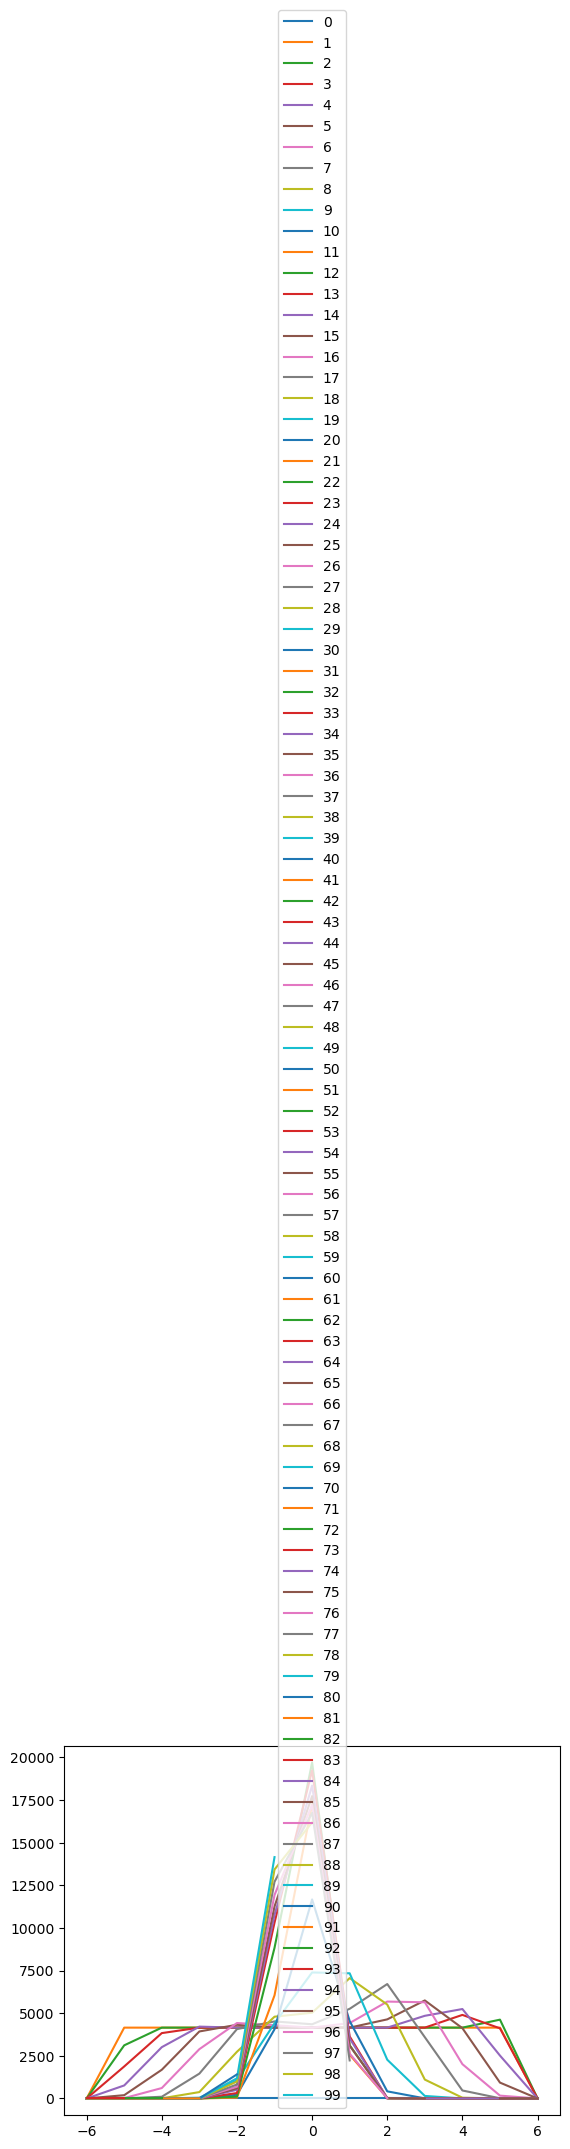

In [16]:
for t, a_line in enumerate(a):
    plt.plot(list(range(-k,l+1)), a_line, label=t)

plt.legend()
plt.show()

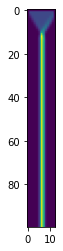

In [144]:
plt.imshow(a)

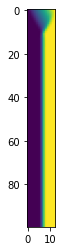

In [145]:
plt.imshow(m)